<a href="https://colab.research.google.com/github/klydem11/AI_CW/blob/master/Reading_Handwritting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scipy==1.1.0

In [ ]:
import time
import requests
import zipfile
import io
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.misc import imread, imresize, imsave
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.transform import resize
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from skimage.feature import hog
import natsort 
import warnings

warnings.filterwarnings('ignore')


In [ ]:
r = requests.get('https://github.com/klydem11/AI_CW/raw/master/WritingRecognitionTest.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
class Extract_Letters:
    def extractFile(self, filename):
        image = imread(filename, 1)

        # apply threshold in order to make the image binary
        #bw = (image < 120).astype(np.float)
        bw = (image < 200).astype(np.float) #u  increased the size

        # remove artifacts connected to image border
        cleared = bw.copy()
        #clear_border(cleared)
        
        # label image regions
        label_image = label(cleared, neighbors=8)
        borders = np.logical_xor(bw, cleared)
        label_image[borders] = -1

        letters = list()
        order = list()
        #print (label_image.max())

        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 16))
        ax.imshow(bw, cmap='jet')

        for region in regionprops(label_image):
            minr, minc, maxr, maxc = region.bbox
            # skip small images
            if maxr - minr > len(image) / 250:  # better to use height rather than area.
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                order.append(region.bbox)
                ax.add_patch(rect)

        ax.set_axis_off()
        plt.tight_layout()
        plt.show()

        # sort the detected characters left->right, top->bottom
        lines = list()
        first_in_line = ''
        counter = 0

        # worst case scenario there can be 1 character per line
        for x in range(len(order)):
            lines.append([])

        for character in order:
            if first_in_line == '':
                first_in_line = character
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) < (first_in_line[2] - first_in_line[0]):
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) > (first_in_line[2] - first_in_line[0]):
                first_in_line = character
                counter += 1
                lines[counter].append(character)

        for x in range(len(lines)):
            lines[x].sort(key=lambda tup: tup[1])

        final = list()
        prev_tr = 0
        prev_line_br = 0

        for i in range(len(lines)):
            for j in range(len(lines[i])):
                tl_2 = lines[i][j][1]
                bl_2 = lines[i][j][0]
                if tl_2 > prev_tr and bl_2 > prev_line_br:
                    tl, tr, bl, br = lines[i][j]
                    letter_raw = bw[tl:bl, tr:br]
                    letter_norm = resize(letter_raw, (20, 20))
                    final.append(letter_norm)
                    prev_tr = lines[i][j][3]
                if j == (len(lines[i]) - 1):
                    prev_line_br = lines[i][j][2]
            prev_tr = 0
            tl_2 = 0
        print ('Characters recognized: ' + str(len(final)))
        return final

In [ ]:
def assignLetters(training_files, folder_string, letter_string):
  import cv2
  from google.colab.patches import cv2_imshow
  print("Extracting characters...")
  start_time = time.time()
  extract = Extract_Letters()

  name_counter = 600
  for files in training_files:
      letters = extract.extractFile(files)
      string_counter = 0
      for i in letters:
        if string_counter > ((len(folder_string)) -1):
           string_counter = 0
        imsave('./WritingRecognition/training_type/' + str(folder_string[string_counter]) + '/' + str(name_counter) + '_snippet.png', i)

        #store_image = []
        #rb_image = cv2.imread('./WritingRecognition/training_type/' + str(folder_string[string_counter]) + '/' + str(name_counter) + '_snippet.png')
        #store_image.append(rb_image)
        #numpy_horizontal = np.hstack((store_image))
        
        print ('training character: ' + str(folder_string[string_counter]) + ' (' + str(name_counter) + '/' + str(len(letters)) + ')')
        #cv2_imshow( numpy_horizontal)
        string_counter += 1
        name_counter += 1

  print (time.time() - start_time, "seconds" )

extract = Extract_Letters()


Extracting characters...


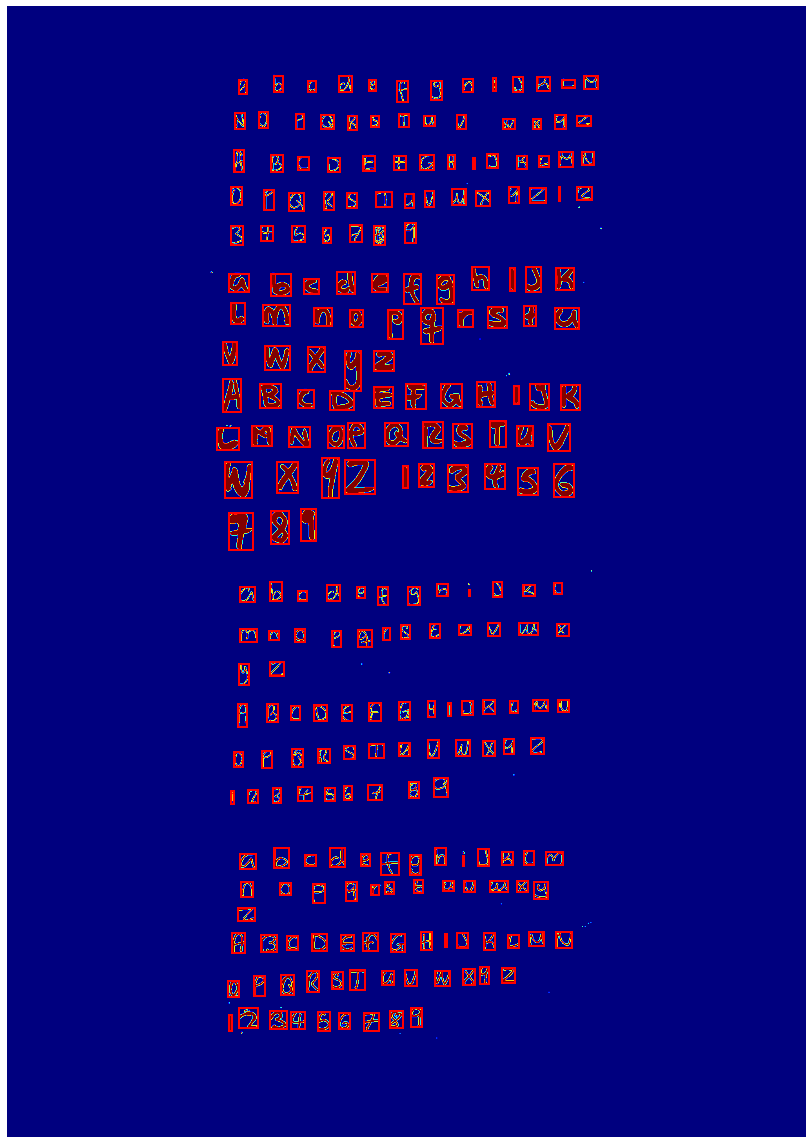

Characters recognized: 244
training character: a (600/244)
training character: b (601/244)
training character: c (602/244)
training character: d (603/244)
training character: e (604/244)
training character: f (605/244)
training character: g (606/244)
training character: h (607/244)
training character: i (608/244)
training character: j (609/244)
training character: k (610/244)
training character: l (611/244)
training character: m (612/244)
training character: n (613/244)
training character: o (614/244)
training character: p (615/244)
training character: q (616/244)
training character: r (617/244)
training character: s (618/244)
training character: t (619/244)
training character: u (620/244)
training character: v (621/244)
training character: w (622/244)
training character: x (623/244)
training character: y (624/244)
training character: z (625/244)
training character: a (626/244)
training character: b (627/244)
training character: c (628/244)
training character: d (629/244)
training char

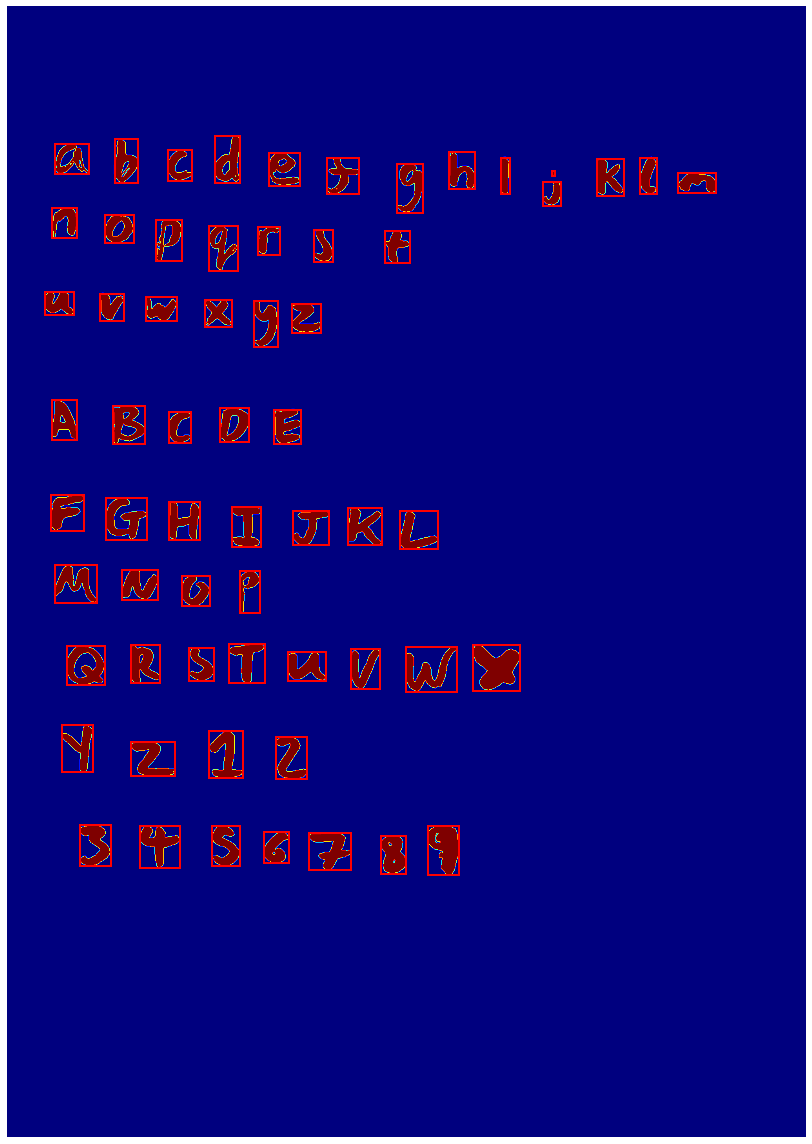

Characters recognized: 61
training character: a (844/61)
training character: b (845/61)
training character: c (846/61)
training character: d (847/61)
training character: e (848/61)
training character: f (849/61)
training character: g (850/61)
training character: h (851/61)
training character: i (852/61)
training character: j (853/61)
training character: k (854/61)
training character: l (855/61)
training character: m (856/61)
training character: n (857/61)
training character: o (858/61)
training character: p (859/61)
training character: q (860/61)
training character: r (861/61)
training character: s (862/61)
training character: t (863/61)
training character: u (864/61)
training character: v (865/61)
training character: w (866/61)
training character: x (867/61)
training character: y (868/61)
training character: z (869/61)
training character: a (870/61)
training character: b (871/61)
training character: c (872/61)
training character: d (873/61)
training character: e (874/61)
training char

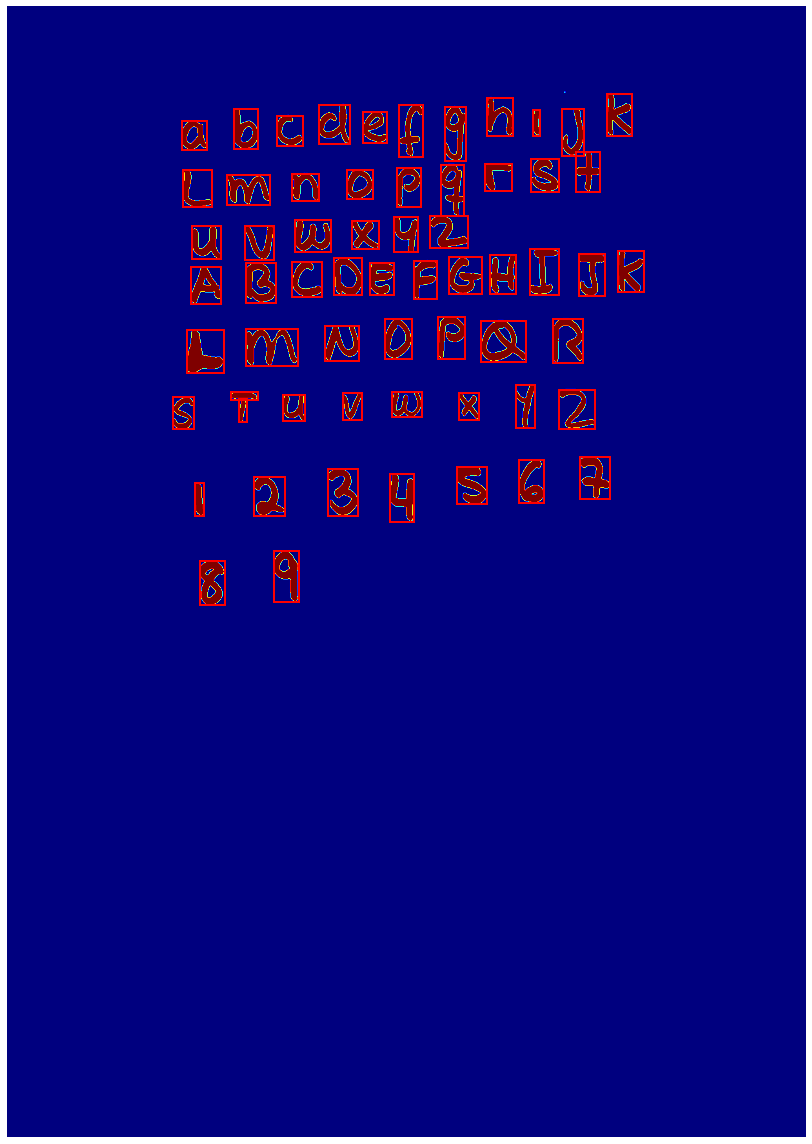

Characters recognized: 61
training character: a (905/61)
training character: b (906/61)
training character: c (907/61)
training character: d (908/61)
training character: e (909/61)
training character: f (910/61)
training character: g (911/61)
training character: h (912/61)
training character: i (913/61)
training character: j (914/61)
training character: k (915/61)
training character: l (916/61)
training character: m (917/61)
training character: n (918/61)
training character: o (919/61)
training character: p (920/61)
training character: q (921/61)
training character: r (922/61)
training character: s (923/61)
training character: t (924/61)
training character: u (925/61)
training character: v (926/61)
training character: w (927/61)
training character: x (928/61)
training character: y (929/61)
training character: z (930/61)
training character: a (931/61)
training character: b (932/61)
training character: c (933/61)
training character: d (934/61)
training character: e (935/61)
training char

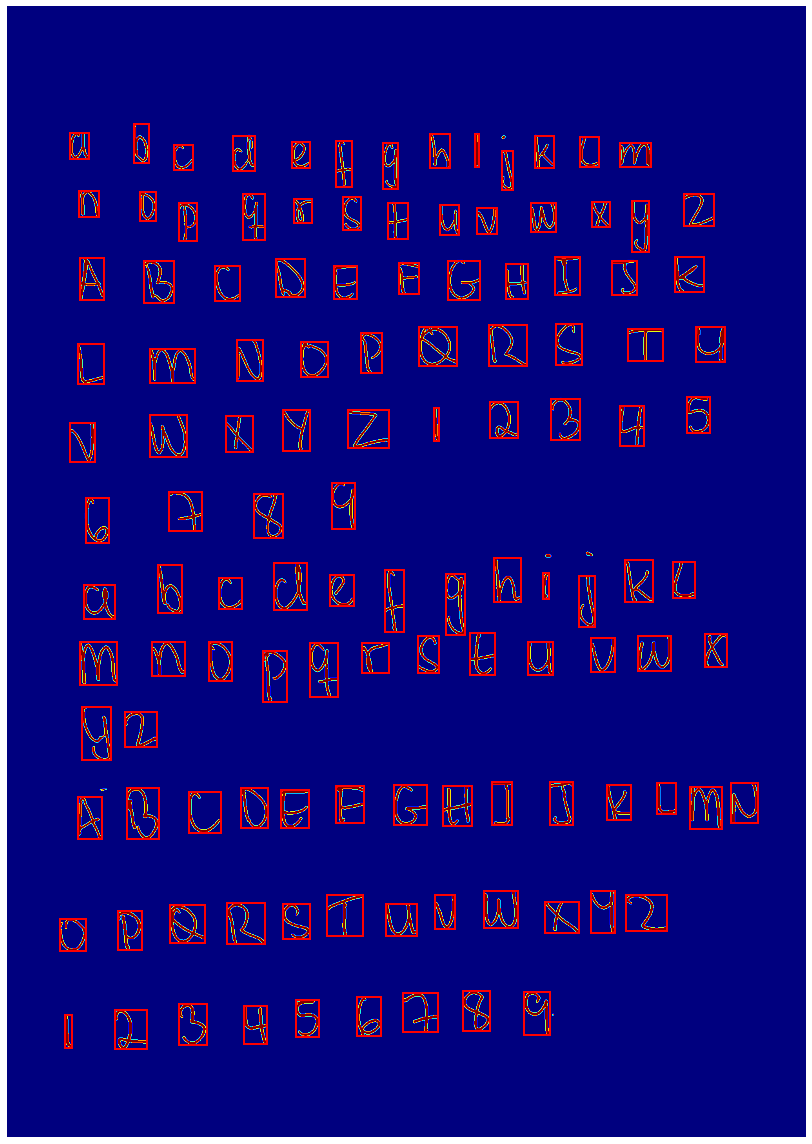

Characters recognized: 122
training character: a (966/122)
training character: b (967/122)
training character: c (968/122)
training character: d (969/122)
training character: e (970/122)
training character: f (971/122)
training character: g (972/122)
training character: h (973/122)
training character: i (974/122)
training character: j (975/122)
training character: k (976/122)
training character: l (977/122)
training character: m (978/122)
training character: n (979/122)
training character: o (980/122)
training character: p (981/122)
training character: q (982/122)
training character: r (983/122)
training character: s (984/122)
training character: t (985/122)
training character: u (986/122)
training character: v (987/122)
training character: w (988/122)
training character: x (989/122)
training character: y (990/122)
training character: z (991/122)
training character: a (992/122)
training character: b (993/122)
training character: c (994/122)
training character: d (995/122)
training char

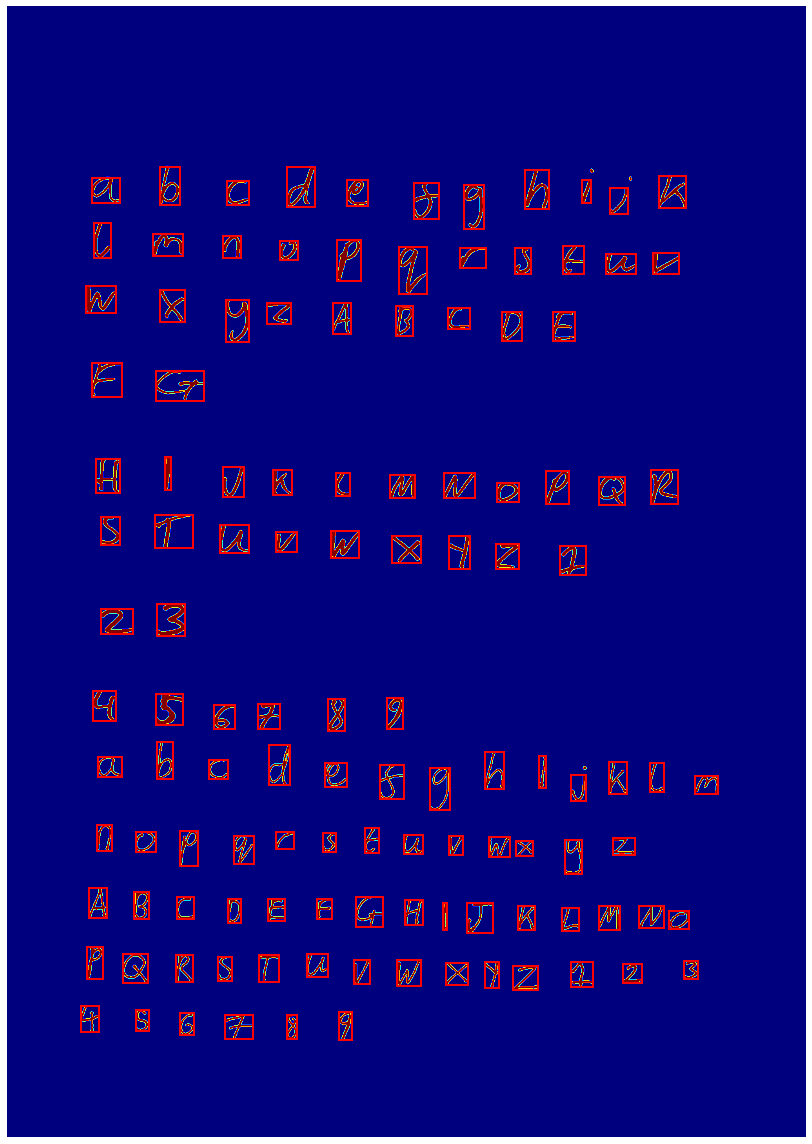

Characters recognized: 122
training character: a (1088/122)
training character: b (1089/122)
training character: c (1090/122)
training character: d (1091/122)
training character: e (1092/122)
training character: f (1093/122)
training character: g (1094/122)
training character: h (1095/122)
training character: i (1096/122)
training character: j (1097/122)
training character: k (1098/122)
training character: l (1099/122)
training character: m (1100/122)
training character: n (1101/122)
training character: o (1102/122)
training character: p (1103/122)
training character: q (1104/122)
training character: r (1105/122)
training character: s (1106/122)
training character: t (1107/122)
training character: u (1108/122)
training character: v (1109/122)
training character: w (1110/122)
training character: x (1111/122)
training character: y (1112/122)
training character: z (1113/122)
training character: a (1114/122)
training character: b (1115/122)
training character: c (1116/122)
training charact

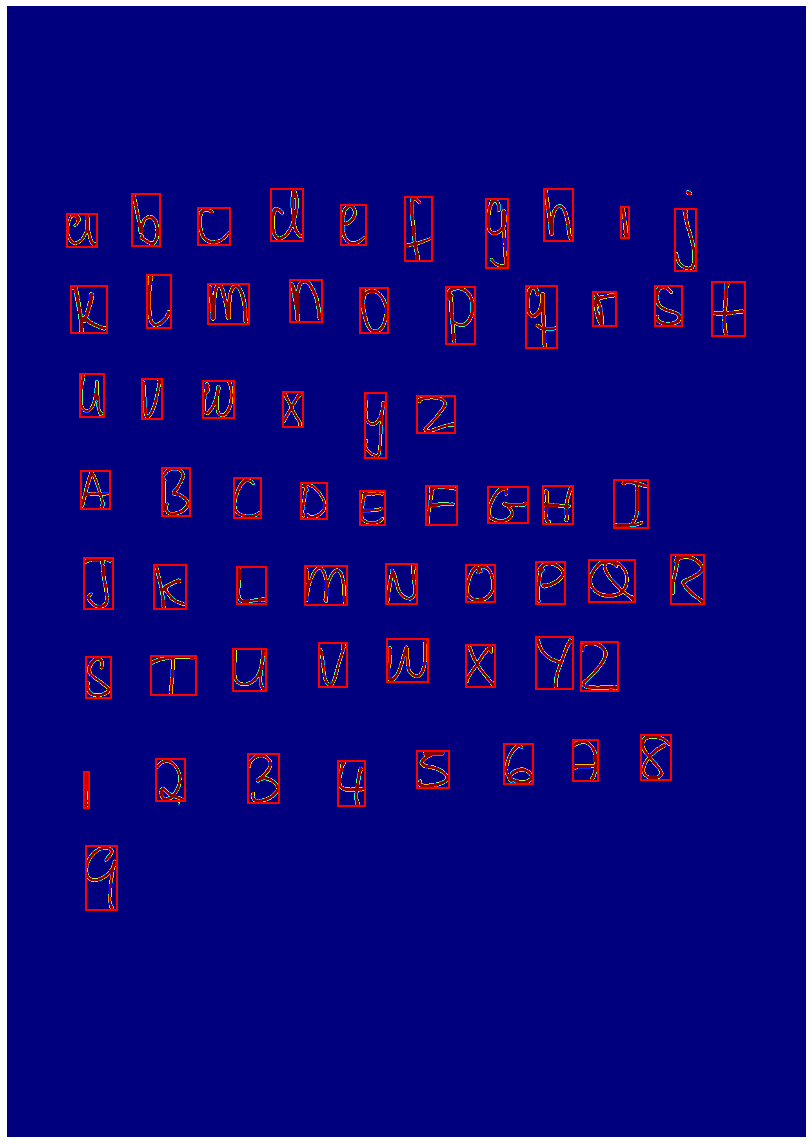

Characters recognized: 61
training character: a (1210/61)
training character: b (1211/61)
training character: c (1212/61)
training character: d (1213/61)
training character: e (1214/61)
training character: f (1215/61)
training character: g (1216/61)
training character: h (1217/61)
training character: i (1218/61)
training character: j (1219/61)
training character: k (1220/61)
training character: l (1221/61)
training character: m (1222/61)
training character: n (1223/61)
training character: o (1224/61)
training character: p (1225/61)
training character: q (1226/61)
training character: r (1227/61)
training character: s (1228/61)
training character: t (1229/61)
training character: u (1230/61)
training character: v (1231/61)
training character: w (1232/61)
training character: x (1233/61)
training character: y (1234/61)
training character: z (1235/61)
training character: a (1236/61)
training character: b (1237/61)
training character: c (1238/61)
training character: d (1239/61)
training chara

In [ ]:
#now for english

handwriting_training = ['./WritingRecognition/ocr/training/training1.png', './WritingRecognition/ocr/training/training2.png', './WritingRecognition/ocr/training/training3.png','./WritingRecognition/ocr/training/training4.png', './WritingRecognition/ocr/training/training5.png', './WritingRecognition/ocr/training/training6.png']
handwriting_folder = 'abcdefghijklmnopqrstuvwxyzabcdefghijklmnopqrstuvwxyz123456789'
handwriting_string = 'abcdefghijklmnopqrstuvwxyz123456789'

assignLetters(handwriting_training, handwriting_folder, handwriting_string)

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#to the newly created training type folder
trainingType_files = './WritingRecognition/training_type/'
#create empty data holders for the training data
data = []
train_label = []

training_start_time = time.time()
#training
for i in handwriting_string:
    cur_letter = i 
    cur_folder = trainingType_files + cur_letter + '/'
    for j in glob.glob(cur_folder + '*.png'):
      cur_folder = j
      image = imread(cur_folder, 1)
      image = imresize(image, (200,200))
      #hog applied here so that they have the same dimensions
      hog_features = hog(image, orientations=12, pixels_per_cell=(16, 16), cells_per_block=(1, 1)) 
      data.append(hog_features)
      train_label.append(cur_letter)
    print ('labelled ' + cur_letter)

#checking if lists are empty
if not data:
    print("Data List is empty")
if not train_label:
    print(" train_label List is empty")

print("Training the classifier..")
#create the SVC
clf = LinearSVC(dual = False, verbose = 1)
#clf = svm.SVC(C=0.01, kernel='poly', degree=3, gamma=2)
#clf = SVC(C=0.01 ,kernel='rbf')
#clf = SVC(kernel='sigmoid')
#clf = KNeighborsClassifier(n_neighbors=5)
#clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#clf = DecisionTreeClassifier()
#train the SVM
clf.fit(data, train_label)

print("\nTraining finished successfully")
print (time.time() - training_start_time, "seconds" )

labelled a
labelled b
labelled c
labelled d
labelled e
labelled f
labelled g
labelled h
labelled i
labelled j
labelled k
labelled l
labelled m
labelled n
labelled o
labelled p
labelled q
labelled r
labelled s
labelled t
labelled u
labelled v
labelled w
labelled x
labelled y
labelled z
labelled 1
labelled 2
labelled 3
labelled 4
labelled 5
labelled 6
labelled 7
labelled 8
labelled 9
Training the classifier..
[LibLinear]
Training finished successfully
11.530123710632324 seconds


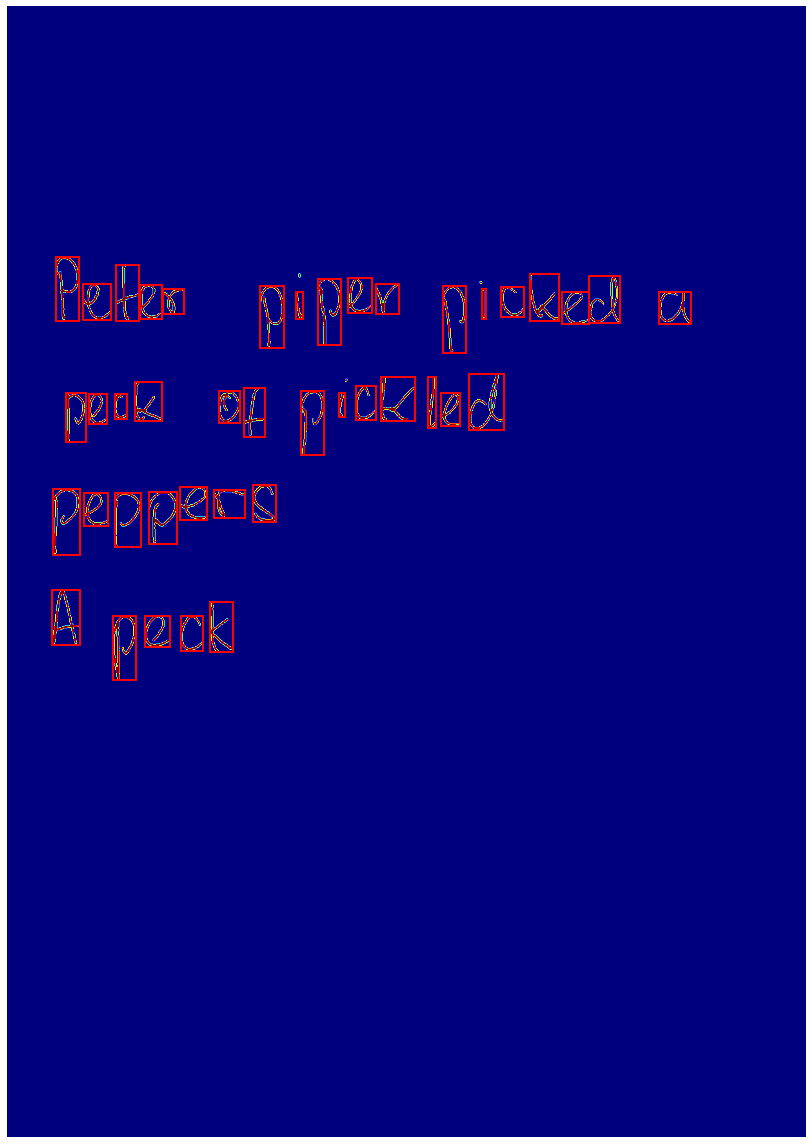

Characters recognized: 42
Sorted Files:
Saved and sorted test1 extracts


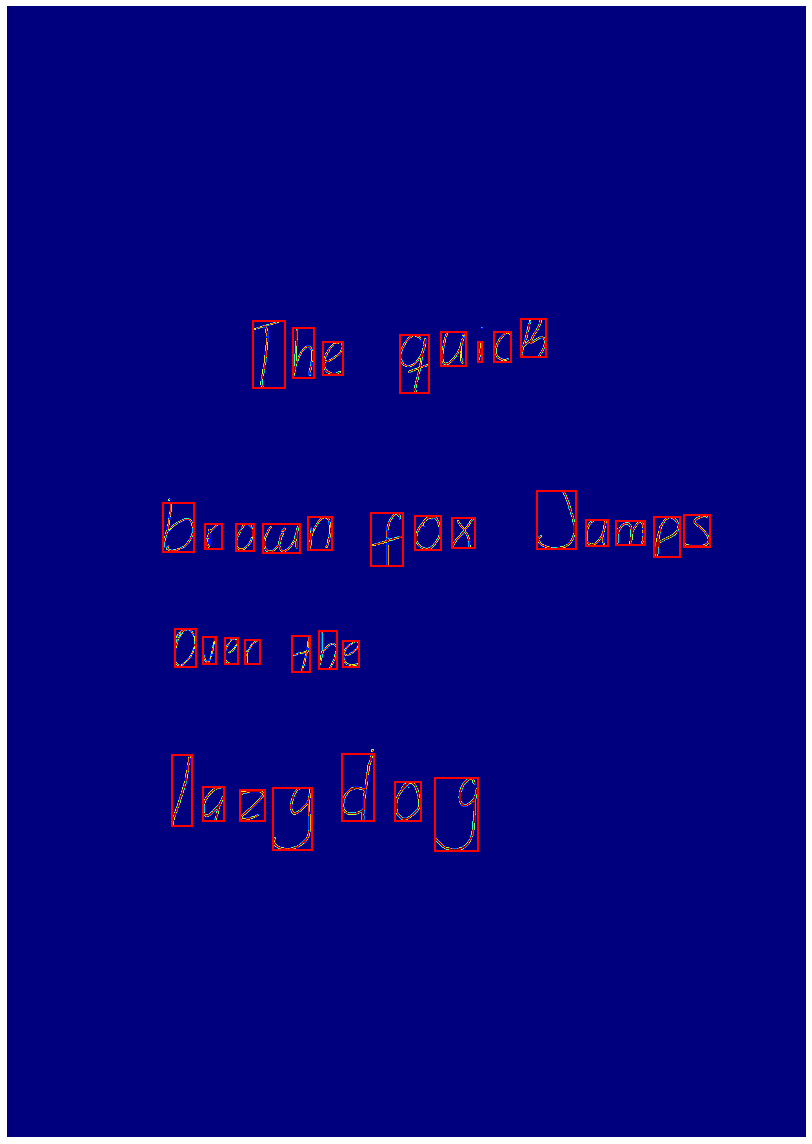

Characters recognized: 35
Sorted Files:
Saved and sorted test2 extracts


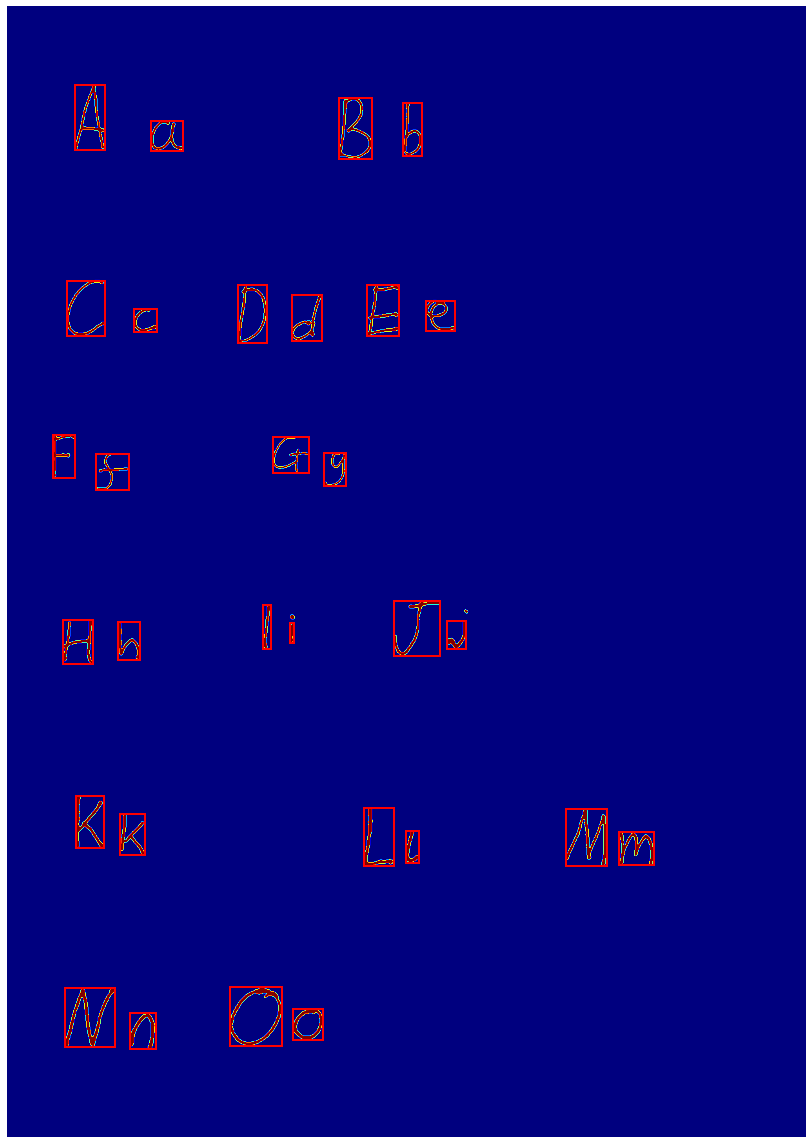

Characters recognized: 30
Sorting Files
['./WritingRecognition/ocr/testing/test3_results/0.png', './WritingRecognition/ocr/testing/test3_results/1.png', './WritingRecognition/ocr/testing/test3_results/2.png', './WritingRecognition/ocr/testing/test3_results/3.png', './WritingRecognition/ocr/testing/test3_results/4.png', './WritingRecognition/ocr/testing/test3_results/5.png', './WritingRecognition/ocr/testing/test3_results/6.png', './WritingRecognition/ocr/testing/test3_results/7.png', './WritingRecognition/ocr/testing/test3_results/8.png', './WritingRecognition/ocr/testing/test3_results/9.png', './WritingRecognition/ocr/testing/test3_results/10.png', './WritingRecognition/ocr/testing/test3_results/11.png', './WritingRecognition/ocr/testing/test3_results/12.png', './WritingRecognition/ocr/testing/test3_results/13.png', './WritingRecognition/ocr/testing/test3_results/14.png', './WritingRecognition/ocr/testing/test3_results/15.png', './WritingRecognition/ocr/testing/test3_results/16.png', 

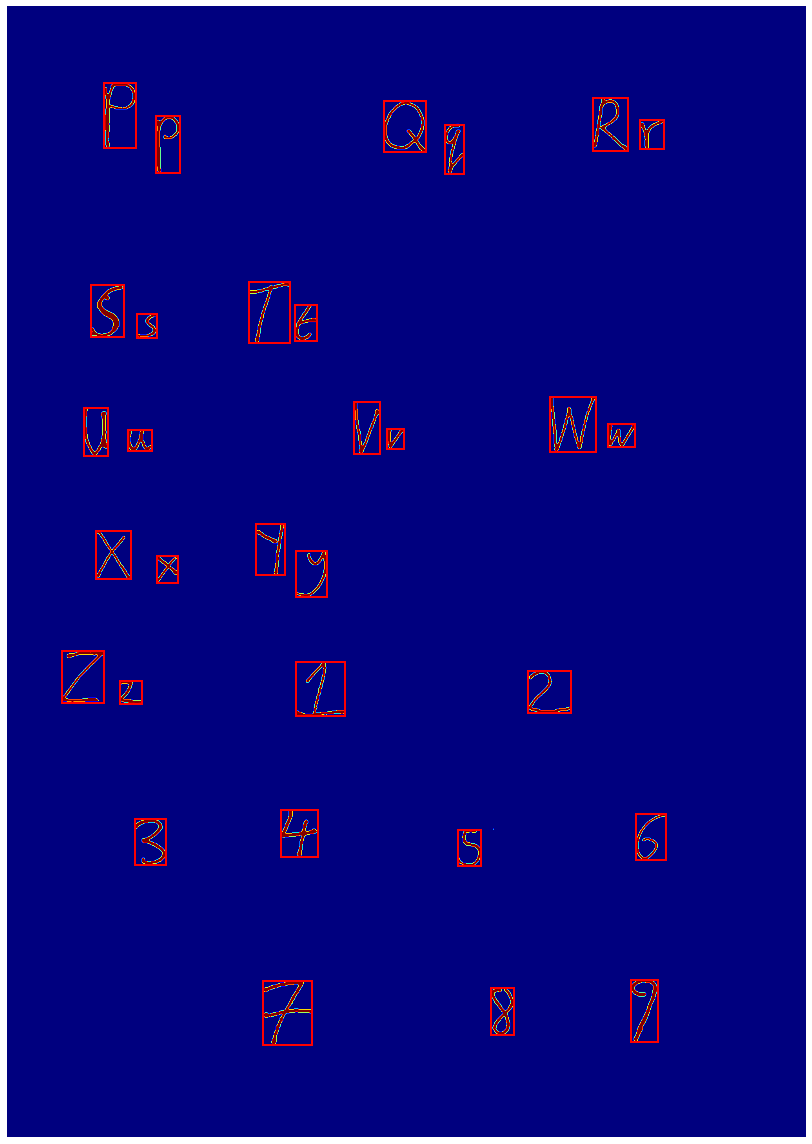

Characters recognized: 31
Sorting Files
['./WritingRecognition/ocr/testing/test4_results/0.png', './WritingRecognition/ocr/testing/test4_results/1.png', './WritingRecognition/ocr/testing/test4_results/2.png', './WritingRecognition/ocr/testing/test4_results/3.png', './WritingRecognition/ocr/testing/test4_results/4.png', './WritingRecognition/ocr/testing/test4_results/5.png', './WritingRecognition/ocr/testing/test4_results/6.png', './WritingRecognition/ocr/testing/test4_results/7.png', './WritingRecognition/ocr/testing/test4_results/8.png', './WritingRecognition/ocr/testing/test4_results/9.png', './WritingRecognition/ocr/testing/test4_results/10.png', './WritingRecognition/ocr/testing/test4_results/11.png', './WritingRecognition/ocr/testing/test4_results/12.png', './WritingRecognition/ocr/testing/test4_results/13.png', './WritingRecognition/ocr/testing/test4_results/14.png', './WritingRecognition/ocr/testing/test4_results/15.png', './WritingRecognition/ocr/testing/test4_results/16.png', 

In [ ]:
#Testing image paths
test_image = ['./WritingRecognition/ocr/testing/test1.png', './WritingRecognition/ocr/testing/test2.png', './WritingRecognition/ocr/testing/test3.png', './WritingRecognition/ocr/testing/test4.png']

#Delete all files in directory before worked on
mydir = './WritingRecognition/ocr/testing/test1_results/'
mydir2 = './WritingRecognition/ocr/testing/test2_results/'
filelist = [ f for f in os.listdir(mydir) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(mydir, f))
filelist = [ f for f in os.listdir(mydir2) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(mydir2, f))
  
mydir = './WritingRecognition/ocr/testing/test3_results/'
filelist = [ f for f in os.listdir(mydir) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(mydir, f))
mydir = './WritingRecognition/ocr/testing/test4_results/'
filelist = [ f for f in os.listdir(mydir) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(mydir, f))

#iterate over files
for files in test_image:
  letters = extract.extractFile(files)
  string_counter = 0
  if files == './WritingRecognition/ocr/testing/test1.png':
    for i in letters:
      imsave('./WritingRecognition/ocr/testing/test1_results/' + str(string_counter) + '.png', i)    
      string_counter += 1
    #Sort files in order of number
    print("Sorted Files:")
    test1_file = glob.glob('./WritingRecognition/ocr/testing/test1_results/*.png')
    test1_file.sort(key = lambda f: int(''.join(filter(str.isdigit, f)))) 
    print("Saved and sorted test1 extracts")
    string_keep = string_counter
  elif files == './WritingRecognition/ocr/testing/test2.png':
    for i in letters:
      imsave('./WritingRecognition/ocr/testing/test2_results/' + str(string_counter) + '.png', i)
      string_counter += 1
    #Sort files in order of number
    print("Sorted Files:")
    test2_file = glob.glob('./WritingRecognition/ocr/testing/test2_results/*.png')
    test2_file.sort(key = lambda f: int(''.join(filter(str.isdigit, f)))) 
    print("Saved and sorted test2 extracts")
  elif files == './WritingRecognition/ocr/testing/test3.png':
    for i in letters:
      imsave('./WritingRecognition/ocr/testing/test3_results/' + str(string_counter) + '.png', i)
      string_counter += 1
    #Sort files in order of number
    print("Sorting Files")
    test3_file = glob.glob('./WritingRecognition/ocr/testing/test3_results/*.png')
    test3_file.sort(key = lambda f: int(''.join(filter(str.isdigit, f)))) 
    print(test3_file)
    print("Saved and sorted test3 extracts")
  elif files == './WritingRecognition/ocr/testing/test4.png':
    for i in letters:
      imsave('./WritingRecognition/ocr/testing/test4_results/' + str(string_counter) + '.png', i)
      string_counter += 1
    #Sort files in order of number
    print("Sorting Files")
    test4_file = glob.glob('./WritingRecognition/ocr/testing/test4_results/*.png')
    test4_file.sort(key = lambda f: int(''.join(filter(str.isdigit, f)))) 
    print(test4_file)
    print("Saved and sorted test3 extracts")

In [ ]:
#Method to get the truth Strings from the text files
def getTruthFile (filePath):
  with open(filePath, 'r') as file:
    truthFile = file.read().replace('\n', '')
  truthFile = truthFile.lower()
  return truthFile

def read(fileName, arr):
  print("Reading...")
  for i in fileName:
    #print(i)
    cur_folder = i
    image = imread(i, 1)
    image = imresize(image, (200,200))
    hog_features = hog(image, orientations = 12, pixels_per_cell=(16,16), cells_per_block=(1,1))
    hog_feautres = hog_features.reshape(1, -1)
    result = clf.predict(hog_feautres)
    arr.append(result)
  #print(str(len(arr)))
  print("Reading Complete.")

def stringToArray(string, array, results):
  string = string.replace(':', '')
  for i in string:
    array.append(i)
  #removing the white space
  while(" " in array) : 
    array.remove(" ") 
  print(array)
  print("characters expected from results: " + str(len(array)))
  #print(len(array))
  print("chracters detected from results: " + str(len(results)))
  print(results)


def accuracy(truth, results):
  true = 0
  false = 0
  for i in range(len(results)):
    if truth[i] == results[i]:
      true += 1
    else:
      false += 1
  accuracy = round((float(true)/(len(results))*100),3)
  print('Characters recongized correctly: ' + str(true))
  print('Characters recongized incorrectly: ' + str(false))
  print("accuracy: " + str(accuracy))


In [ ]:
#empty array to hold results
test1_results = []
test2_results = []
test3_results = []
test4_results = []

#test data extracted, resized and prediction of characters is found and placed in empty array
read(test1_file, test1_results)
read(test2_file, test2_results)
read(test3_file, test3_results)
read(test4_file, test4_results)


Reading...
Reading Complete.
Reading...
Reading Complete.
Reading...
Reading Complete.
Reading...
Reading Complete.


In [ ]:
test1_truth_filePath = "./WritingRecognition/ocr/testing/test1_ground_truth.txt"
test2_truth_filePath = "./WritingRecognition/ocr/testing/test2_ground_truth.txt"
test3_truth_filePath =  "./WritingRecognition/ocr/testing/test3_ground_truth.txt"
test4_truth_filePath =  "./WritingRecognition/ocr/testing/test4_ground_truth.txt"

#getting strings
test1_truth_string = getTruthFile(test1_truth_filePath)
test2_truth_string = getTruthFile(test2_truth_filePath)
test3_truth_string = getTruthFile(test3_truth_filePath)
test4_truth_string = getTruthFile(test4_truth_filePath)
real_test1_array = []
real_test2_array = []
real_test3_array = []
real_test4_array = []

print("test1:")
stringToArray(test1_truth_string, real_test1_array, test1_results)
print("\ntest2:")
stringToArray(test2_truth_string, real_test2_array, test2_results)
print("\ntest3:")
stringToArray(test3_truth_string, real_test3_array, test3_results)
print("\ntest4:")
stringToArray(test4_truth_string, real_test4_array, test4_results)


test1:
['p', 'e', 't', 'e', 'r', 'p', 'i', 'p', 'e', 'r', 'p', 'i', 'c', 'k', 'e', 'd', 'a', 'p', 'e', 'c', 'k', 'o', 'f', 'p', 'i', 'c', 'k', 'l', 'e', 'd', 'p', 'e', 'p', 'p', 'e', 'r', 's', 'a', 'p', 'e', 'c', 'k']
characters expected from results: 42
chracters detected from results: 42
[array(['p'], dtype='<U1'), array(['e'], dtype='<U1'), array(['t'], dtype='<U1'), array(['e'], dtype='<U1'), array(['x'], dtype='<U1'), array(['p'], dtype='<U1'), array(['l'], dtype='<U1'), array(['p'], dtype='<U1'), array(['b'], dtype='<U1'), array(['v'], dtype='<U1'), array(['p'], dtype='<U1'), array(['i'], dtype='<U1'), array(['c'], dtype='<U1'), array(['e'], dtype='<U1'), array(['e'], dtype='<U1'), array(['d'], dtype='<U1'), array(['a'], dtype='<U1'), array(['p'], dtype='<U1'), array(['e'], dtype='<U1'), array(['c'], dtype='<U1'), array(['2'], dtype='<U1'), array(['o'], dtype='<U1'), array(['t'], dtype='<U1'), array(['p'], dtype='<U1'), array(['i'], dtype='<U1'), array(['c'], dtype='<U1'), array(

In [ ]:
#accuracy calcuting
from sklearn.metrics import accuracy_score

print("test 1:")
dec = accuracy_score(real_test1_array, test1_results)
test1_accuracy = round((dec*100),3)
print(test1_accuracy)

print("\ntest 2:")
dec = accuracy_score(real_test2_array, test2_results)
test2_accuracy = round((dec*100),3)
print(test2_accuracy)

print("\ntest 3:")
dec = accuracy_score(real_test3_array, test3_results)
test3_accuracy = round((dec*100),3)
print(test3_accuracy)

print("\ntest 4:")
dec = accuracy_score(real_test4_array, test4_results)
test4_accuracy = round((dec*100),3)
print(test4_accuracy)

test 1:
78.571

test 2:
82.857

test 3:
90.0

test 4:
80.645


In [ ]:
y_pred = test1_results

print(y_pred)


[array(['p'], dtype='<U1'), array(['e'], dtype='<U1'), array(['t'], dtype='<U1'), array(['e'], dtype='<U1'), array(['x'], dtype='<U1'), array(['p'], dtype='<U1'), array(['l'], dtype='<U1'), array(['p'], dtype='<U1'), array(['b'], dtype='<U1'), array(['v'], dtype='<U1'), array(['p'], dtype='<U1'), array(['i'], dtype='<U1'), array(['c'], dtype='<U1'), array(['e'], dtype='<U1'), array(['e'], dtype='<U1'), array(['d'], dtype='<U1'), array(['a'], dtype='<U1'), array(['p'], dtype='<U1'), array(['e'], dtype='<U1'), array(['c'], dtype='<U1'), array(['2'], dtype='<U1'), array(['o'], dtype='<U1'), array(['t'], dtype='<U1'), array(['p'], dtype='<U1'), array(['i'], dtype='<U1'), array(['c'], dtype='<U1'), array(['k'], dtype='<U1'), array(['z'], dtype='<U1'), array(['e'], dtype='<U1'), array(['d'], dtype='<U1'), array(['p'], dtype='<U1'), array(['e'], dtype='<U1'), array(['p'], dtype='<U1'), array(['p'], dtype='<U1'), array(['e'], dtype='<U1'), array(['r'], dtype='<U1'), array(['s'], dtype='<U1'), 

In [ ]:
def read(fileName, arr):
  print("Reading...")
  for i in fileName:
    #print(i)
    cur_folder = i
    image = imread(i, 1)
    image = imresize(image, (200,200))
    hog_features = hog(image, orientations = 12, pixels_per_cell=(16,16), cells_per_block=(1,1))
    hog_feautres = hog_features.reshape(1, -1)
    result = clf.predict(hog_feautres)
    arr.append(result)
  #print(str(len(arr)))
  print("Reading Complete.")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix( test1_results, real_test1_array))
print(classification_report(test1_results, real_test1_array))

[[ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1

Reading...
Reading Complete.
Reading...
Reading Complete.
Reading...
Reading Complete.
